# Individual Planning Report

In [175]:
library(tidyverse)
library(scales)

## Data Description

In [176]:
players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")

glimpse(players)
glimpse(sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…
Rows: 1,535
Columns: 5
$ hashedEmail         <chr> "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8a…
$ start_time          <chr> "30/06/2024 18:12", "17/06/2024 23:33", "25/07/202…
$ end_time            <chr> "30/06/2024 18:24", "17/06/2024 23:46", "25/07/202…
$ original_start_time <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…
$ original_end_time   <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+

- **Players:**
    - Number of Observations: 196
    - Number of Variables: 7

| Name of Variable | Type of Variable | Meaning of Varibles | Possible Issues |
|-----------------|-----------------|-------------------|----------------|
| Age | Double | Displays the age of the player | Type may need to be changed to type Integer to optimize for memory since that will not impact data regardless |
| Gender | Character | Displays the gender of the player | |
| Name | Character | Displays the name of the player | |
| Played Hours | Double | Displays the amount of time the player has spent playing the games | There seem to be outliers which may skew results hence data may need to be standardized |
| Hashed Email | Character | Displays the email address of the player, hashed out for privacy purposes | |
| Subscribe | Logical | Displays whether the player is subscribed to a game-related newsletter or not | |
| Experience | Character | Displays the level the player is at in the game (Beginner, Amateur, Regular, Pro, Veteran) | |

- **Sessions:**
    - Number of Observations: 1535
    - Number of Variables: 5

| Name of Variable     | Type of Variable | Meaning of Variables                                                                                  | Possible Issues                                                                                          |
|---------------------|-----------------|----------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------|
| Start Time           | Character       | Displays the time at which a player started playing the game on a certain date (which is also displayed here) | Type may need to be changed to data/time format to utilize effectively OR it may need to be separated into different columns as we tidy our data |
| End Time             | Character       | Displays the time at which a player ended playing the game on a certain date (which is also displayed here) | Type may need to be changed to data/time format to utilize effectively OR it may need to be separated into different columns as we tidy our data |
| Original Start Time  | Double          | Displays the start time in UNIX time (milliseconds)                                               | Data may need to be changed to a more readable form                                                     |
| Original End Time    | Double          |  Displays the end time in UNIX time (milliseconds)                                               | Data may need to be changed to a more readable form                                                     |
| Hashed Email         | Character       | Displays the email address of the player, hashed out for privacy purposes                        |                                                                                                         |



## Questions

**Broad Question:** 
- Question 1: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?
  
**Specific Question:** 
- Can age, gender, experience level and played hours predict whether a player subscribes to a game-related newsletter?

**Describe clearly how the data will help you address the question of interest. You may need to describe how you plan to wrangle your data to get it into a form where you can apply one of the predictive methods from this class.**
- The players.csv dataset will be used in order to address this question of interest. It contains the explanatory variables we are focusing on, which are age, gender, experience, and hours played as well as our response variable which is whether a player subscribes to a newsletter or not. Since, the broad questions mentioned both characteristics and behaviors, we can choose these four explanatory variables to answer both sides of the question, and give an accurate representation of whether a player subscribes to the newsletter or not. In order to correctly utilize these variables, I would need to change the type of age from double to integer, and standardize the age and played hours variables to manage the effects of any outliers.


## Exploratory Data Analysis and Visualization

Mean_Ages,Mean_Played_Hours
<dbl>,<dbl>
21.13918,5.845918


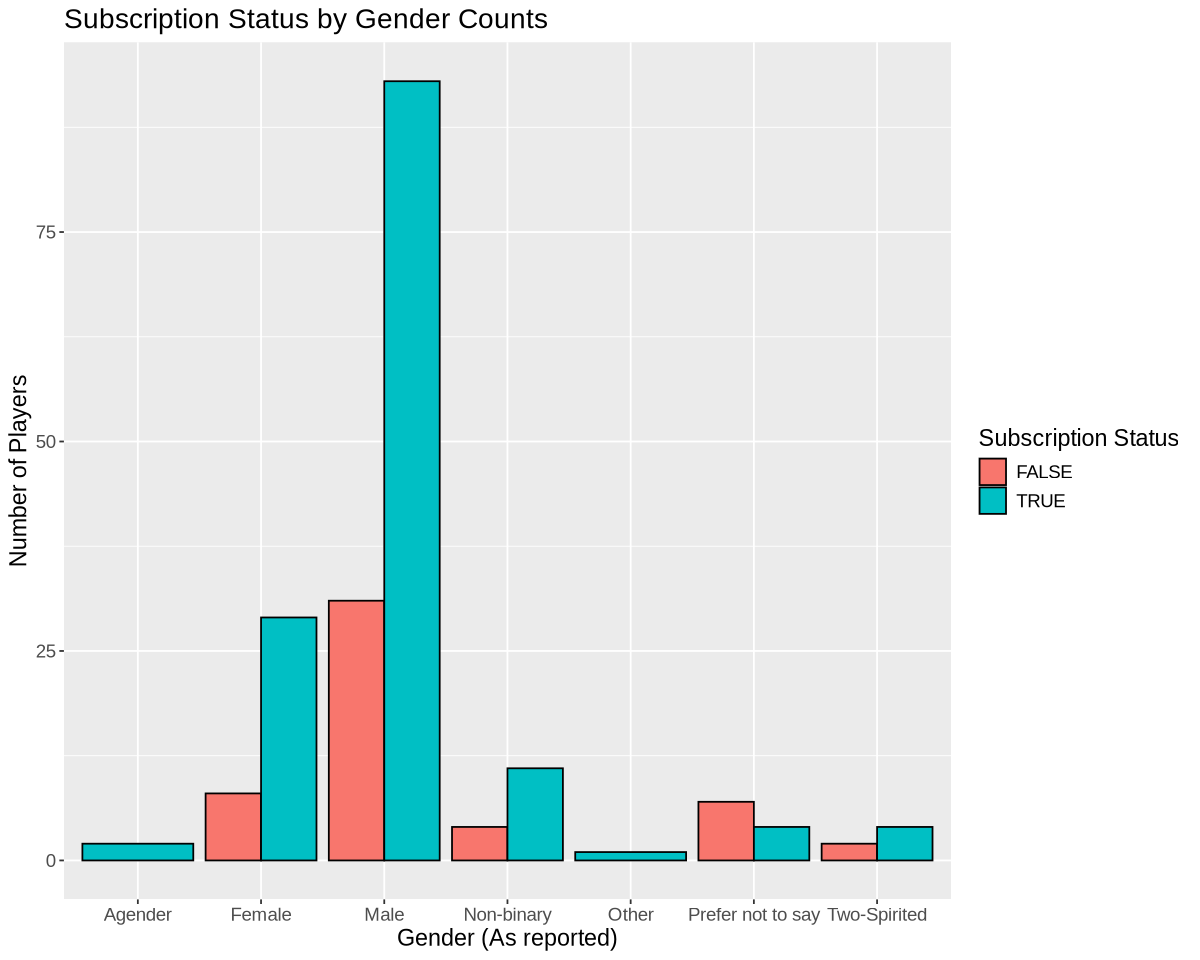

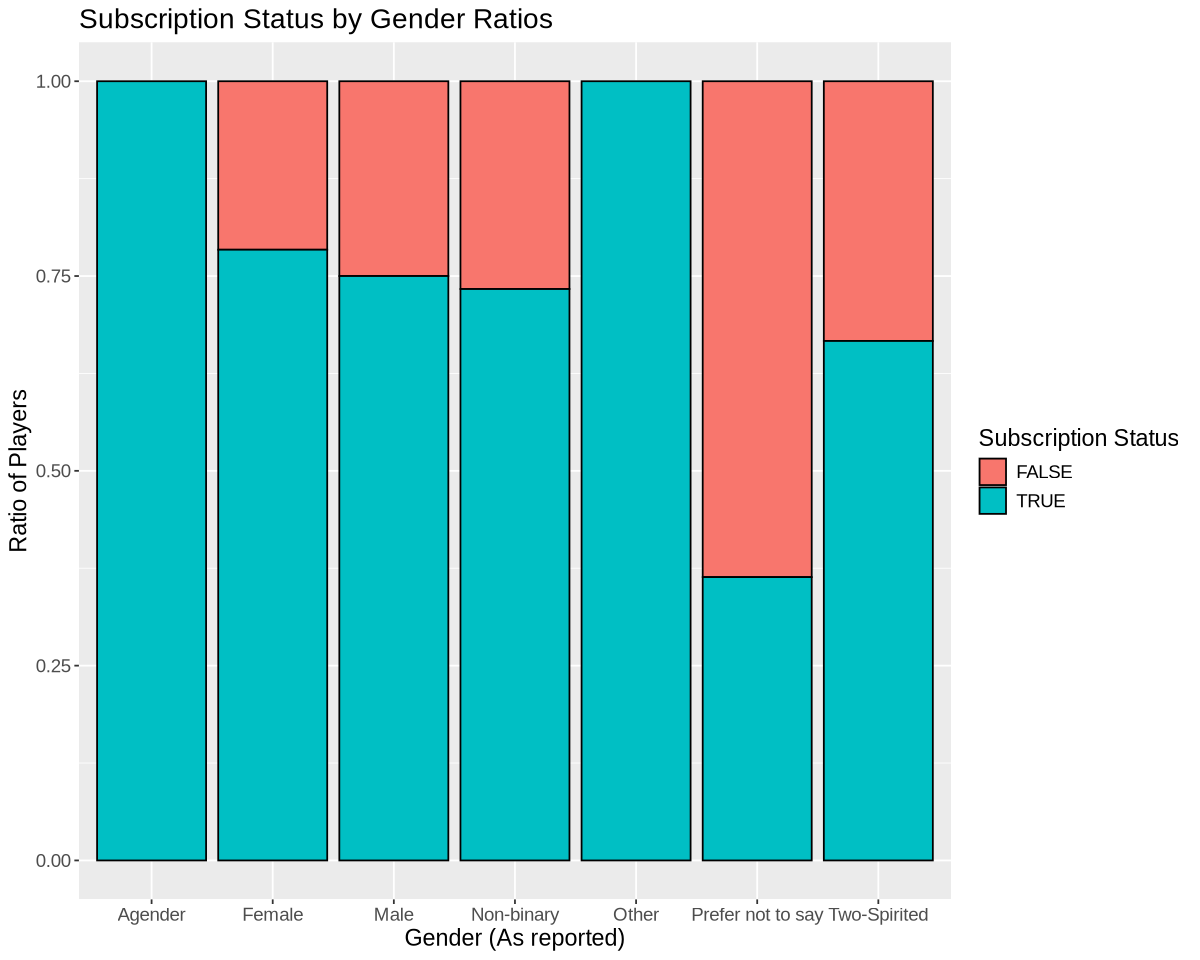

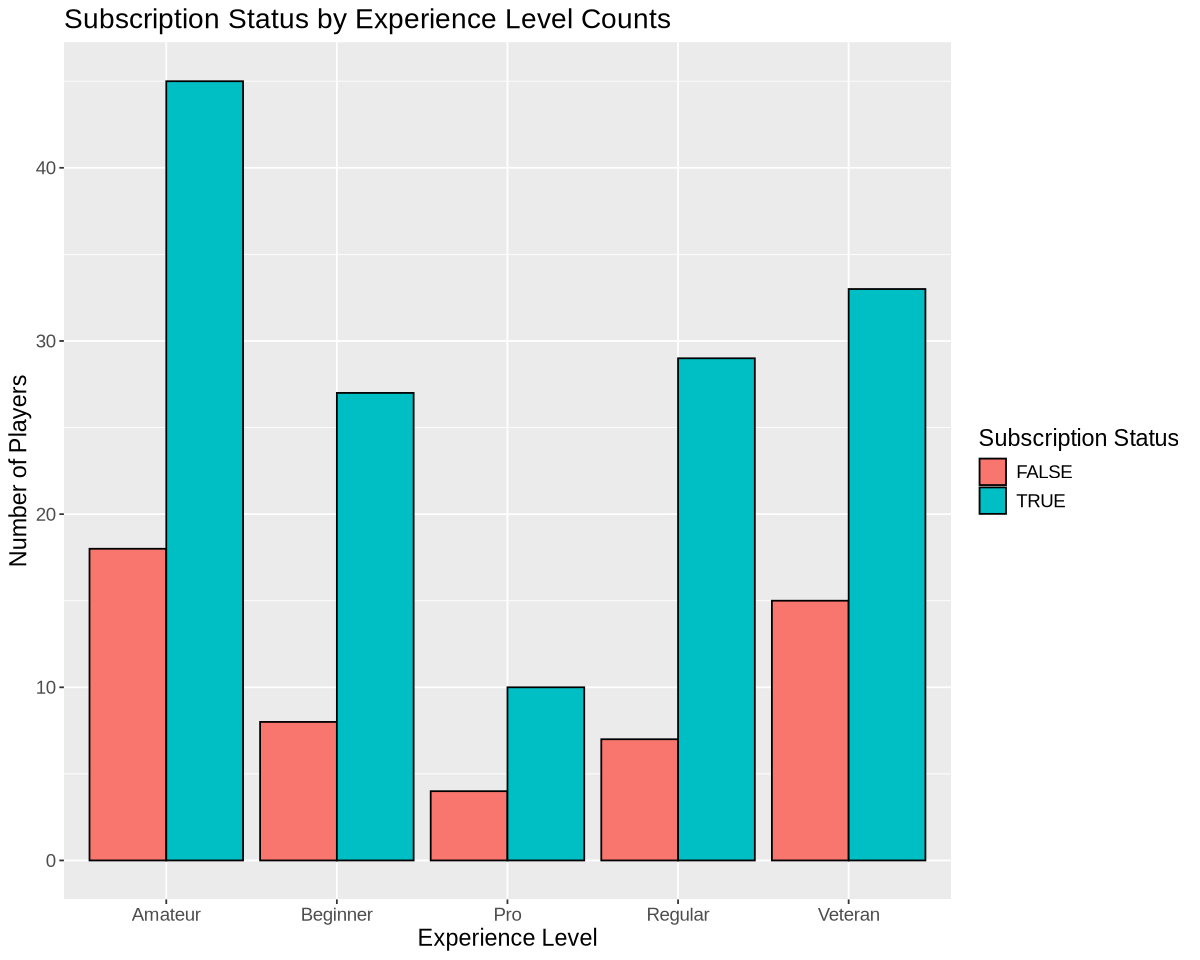

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


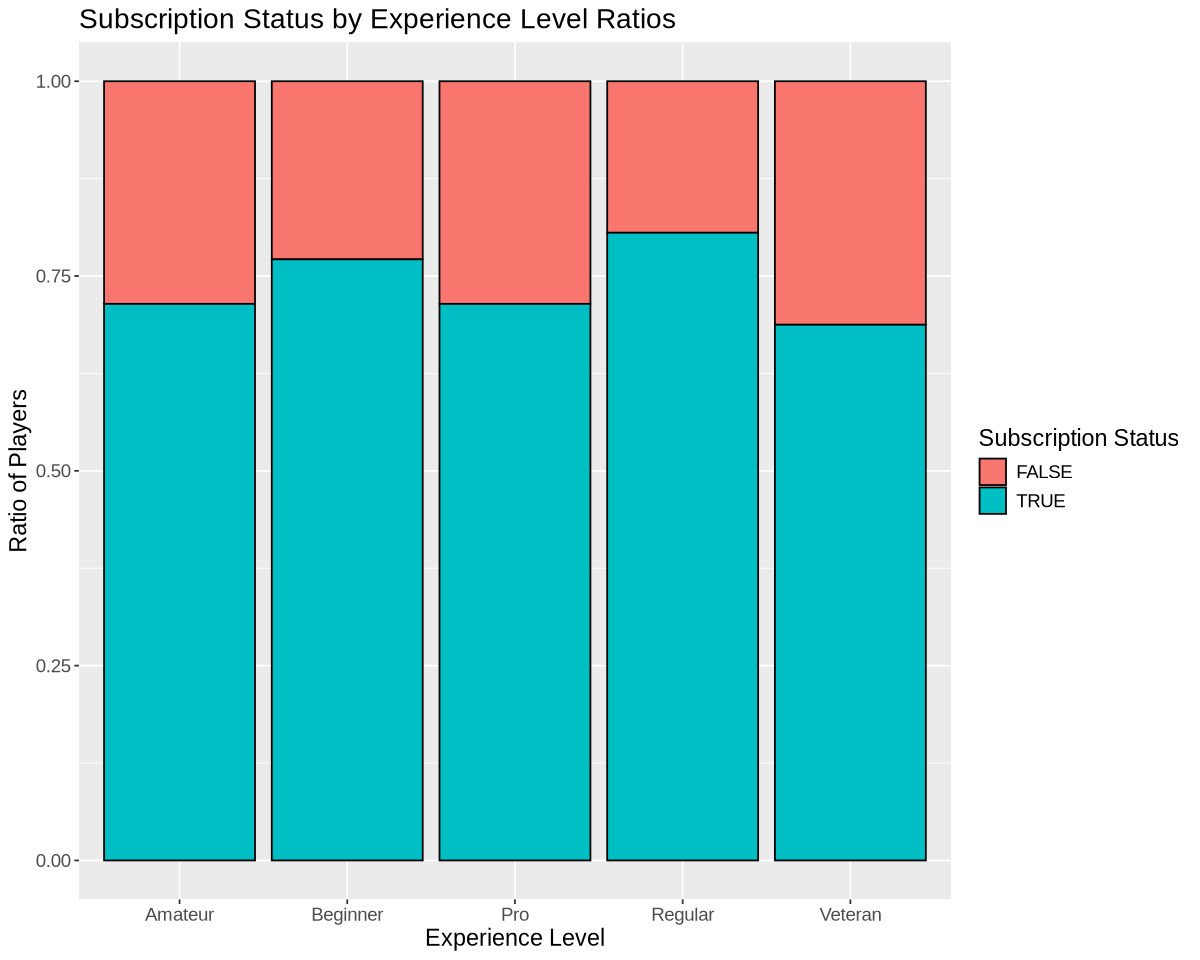

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_bar()`).”


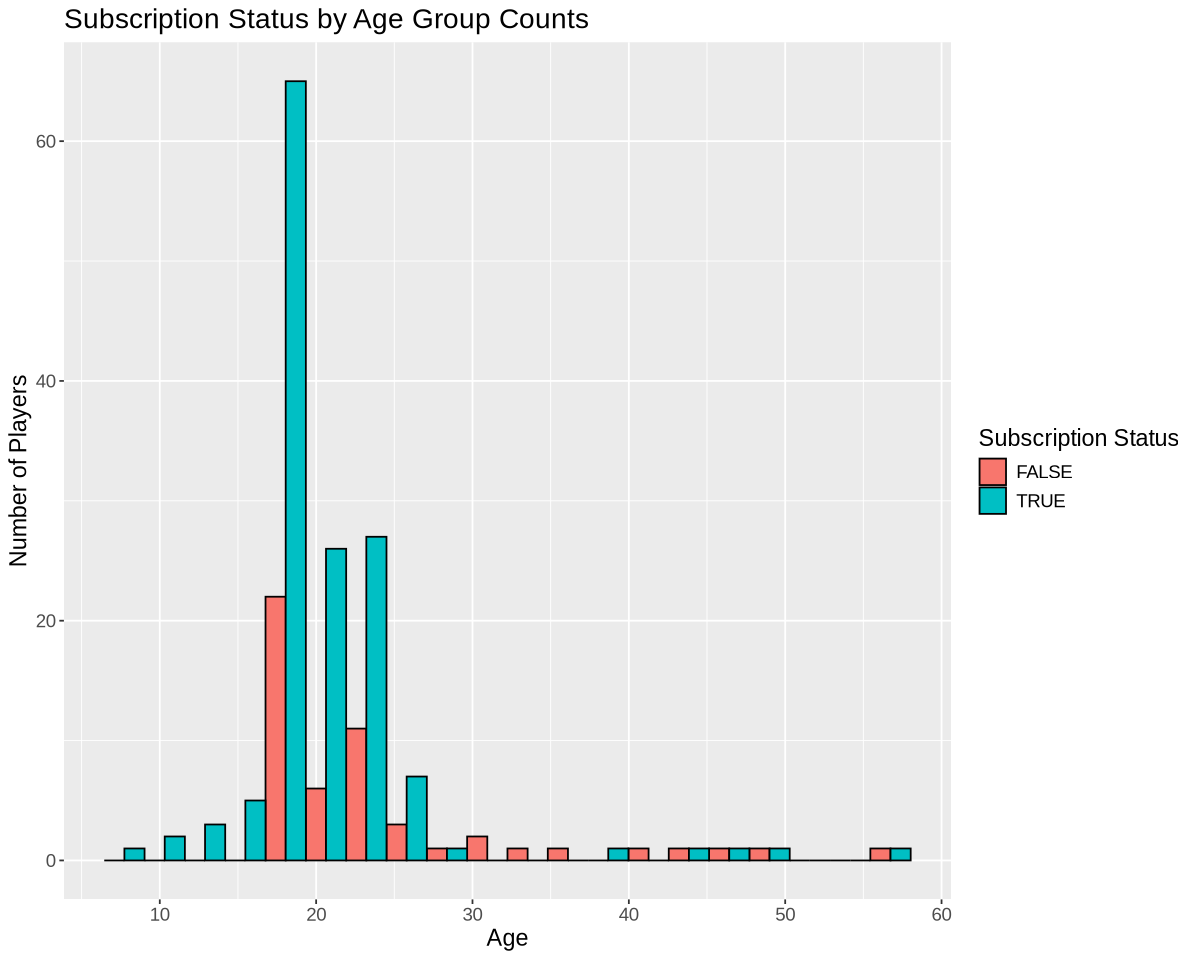

Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 85 rows containing non-finite outside the scale range (`stat_bin()`).”


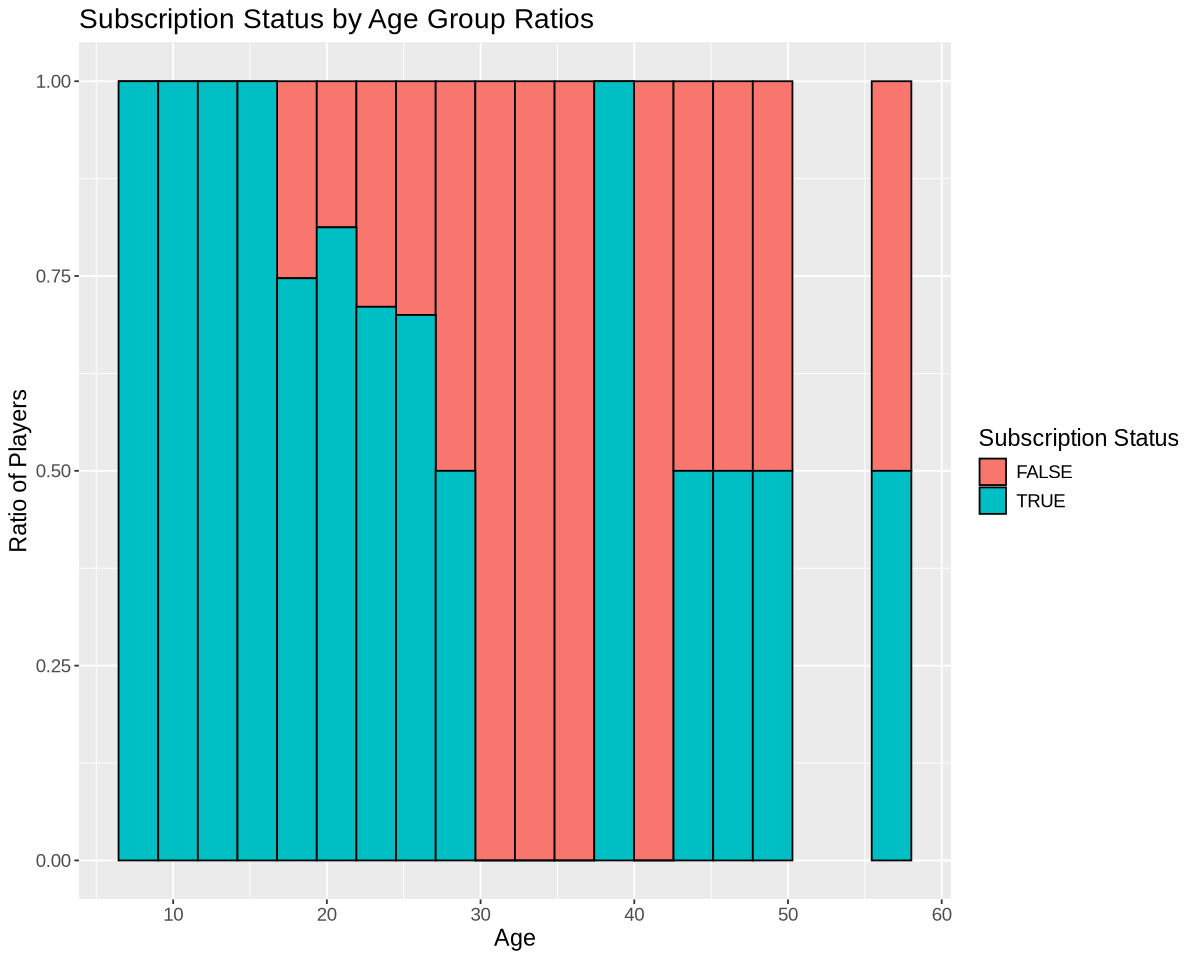

Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 85 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_bar()`).”


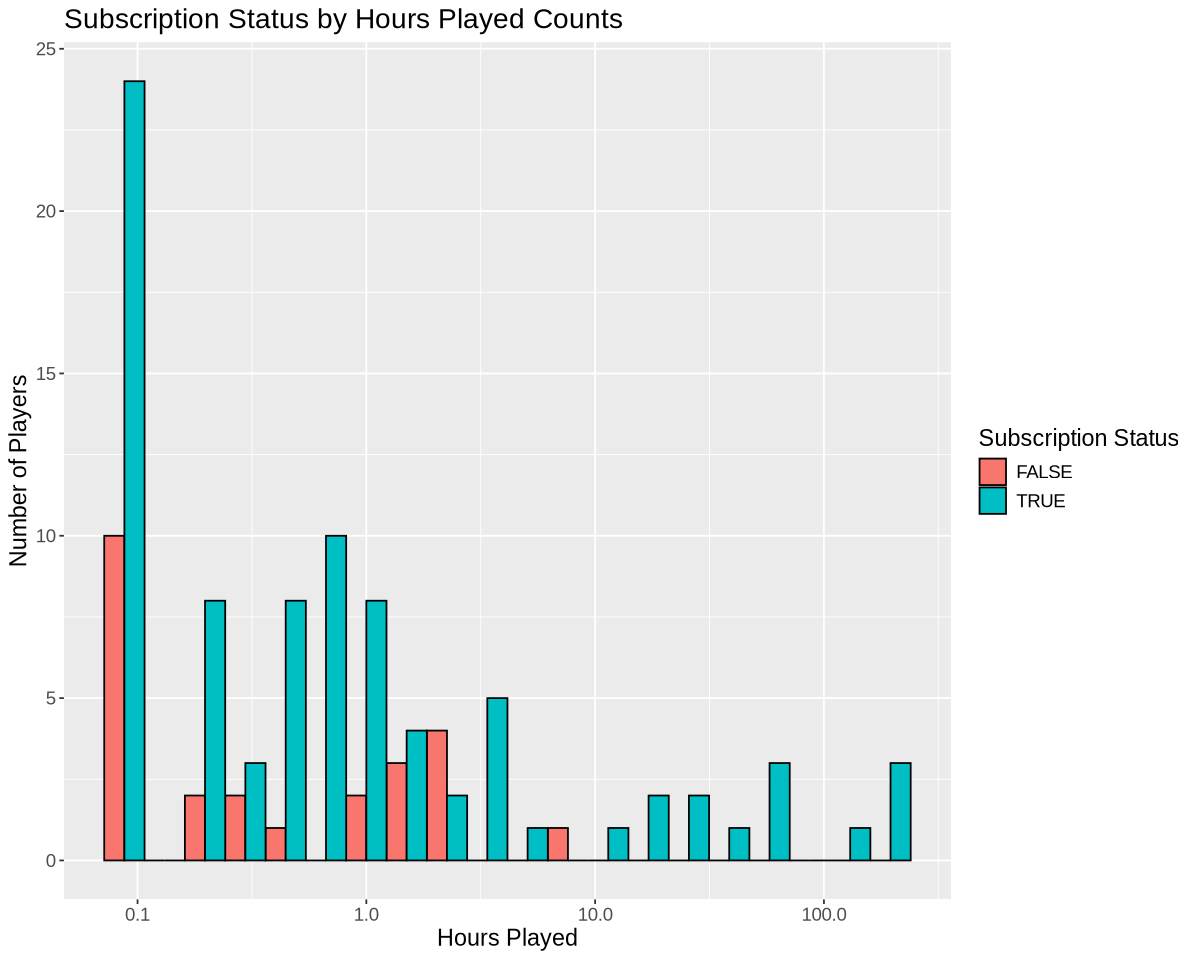

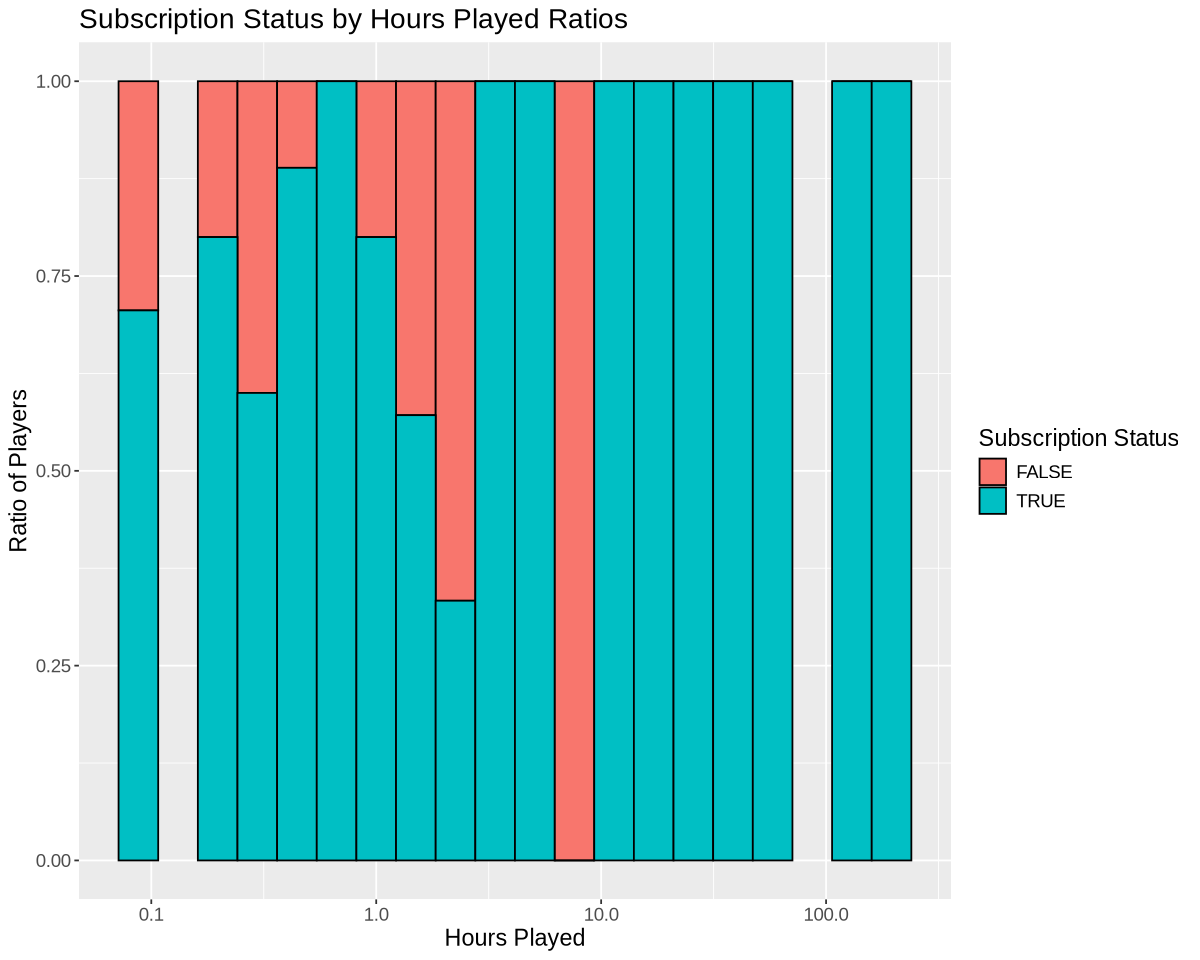

In [177]:
## Clean players - manage types
players_clean <- players |>
mutate(Age = as.integer(Age))

## Mean Values for each quantitative variable in the players.csv data set
players_mean <- players_clean |>
select(Age, played_hours) |>
summarize(Mean_Ages = mean(Age, na.rm = TRUE), Mean_Played_Hours = mean(played_hours, na.rm = TRUE))


## VISUALIZATIONS (FOUR)

## GENDER NON-RATIO
options(repr.plot.width = 10, repr.plot.height = 8) 

Gender_Subs <- players_clean  |>
     ggplot(aes(x = gender, fill = subscribe)) +
     geom_bar(position = "dodge", color = "black") +
     labs(title = "Subscription Status by Gender Counts", x = "Gender (As reported)", y = "Number of Players", fill = "Subscription Status") +
     theme(text = element_text(size = 14))

## GENDER RATIO

Gender_Subs_Ratio <- players_clean  |>
     ggplot(aes(x = gender, fill = subscribe)) +
     geom_bar(position = "fill", color = "black") +
     labs(title = "Subscription Status by Gender Ratios", x = "Gender (As reported)", y = "Ratio of Players", fill = "Subscription Status") +
     theme(text = element_text(size = 14))

## EXPERIENCE NON-RATIO
options(repr.plot.width = 10, repr.plot.height = 8) 

Experience_Subs <- players_clean  |>
    ggplot(aes(x = experience, fill = subscribe)) +
    geom_bar(position = "dodge", color = "black") +
    labs(title = "Subscription Status by Experience Level Counts", x = "Experience Level", y = "Number of Players", fill = "Subscription Status") +
    theme(text = element_text(size = 14))

## EXPERIENCE RATIO

Experience_Subs_Ratio <- players_clean  |>
    ggplot(aes(x = experience, fill = subscribe)) +
    geom_bar(position = "fill", color = "black") +
    labs(title = "Subscription Status by Experience Level Ratios", x = "Experience Level", y = "Ratio of Players", fill = "Subscription Status") +
    theme(text = element_text(size = 14))

## AGE NON-RATIO
options(repr.plot.width = 10, repr.plot.height = 8) 

Age_Subs <- players_clean  |>
    ggplot(aes(x = Age, fill = subscribe)) +
    geom_histogram(bins = 20, position = "dodge", color = "black") +
    labs(title = "Subscription Status by Age Group Counts", x = "Age", y = "Number of Players", fill = "Subscription Status") +
    theme(text = element_text(size = 14))

## AGE RATIO

Age_Subs_Ratio <- players_clean  |>
    ggplot(aes(x = Age, fill = subscribe)) +
    geom_histogram(bins = 20, position = "fill", color = "black") +
    labs(title = "Subscription Status by Age Group Ratios", x = "Age", y = "Ratio of Players", fill = "Subscription Status") +
    theme(text = element_text(size = 14))

## HOURS PLAYED NON-RATIO
options(repr.plot.width = 10, repr.plot.height = 8) 

Played_Hours_Subs <- players_clean  |>
    ggplot(aes(x = played_hours, fill = subscribe)) +
    geom_histogram(bins = 20, position = "dodge", color = "black") +
    scale_x_log10() +
    labs(title = "Subscription Status by Hours Played Counts", x = "Hours Played", y = "Number of Players", fill = "Subscription Status") +
    theme(text = element_text(size = 14))

## HOURS PLAYED RATIO

Played_Hours_Subs_Ratio <- players_clean  |>
    ggplot(aes(x = played_hours, fill = subscribe)) +
    geom_histogram(bins = 20, position = "fill", color = "black") +
    scale_x_log10() +
    labs(title = "Subscription Status by Hours Played Ratios", x = "Hours Played", y = "Ratio of Players", fill = "Subscription Status") +
    theme(text = element_text(size = 14))

## Mean Table, Visualization outputs
players_mean

Gender_Subs
Gender_Subs_Ratio

Experience_Subs
Experience_Subs_Ratio

Age_Subs
Age_Subs_Ratio

Played_Hours_Subs
Played_Hours_Subs_Ratio

**Subscription Status by Gender**

The gender counts graph clearly shows that the majority of players in this data set are male, and hence also make up the largest share of both subscribers and non-subscribers. However, if we look at the gender ratios graph, we can clearly see that the Agender category makes up the highest share of subscribers but since there are such few players in that category that we cannot safely conclude anything there. From our knowledge of the gender counts graphs, we can more accurately compare the two largest groups males vs. females and can see that females are more likely to subscribe to the newletter. However, we must be a bit wary of the conclusion due to the large discrepency in amount of data given between male players and other players.

**Subscription Status by Experience Level**

As depicted in the experience counts graph, amateur players and regular players make up the majority of the players, and hence also make up the largest group of subscriptions (led by amateur players). Pro players are less frequent overall, and also show lower subscription counts. However, once we look at ratios in the experience ratios graph, we can see clearly that the largest group subscribers are the regular players, closely followed by the beginners. Since the amount of data is relatively similar, we can draw a stronger conclusion that regular players make up a large group of the total subscribers.

**Subscription Status by Age Groups**

The age counts graph shows that the majority of players fall between the ages of 10-30 and those players are also the ones with the highest subscription count, especially in the 16-25 age range. Now looking at the age ratios graph, we can see that age ranges of 0-16 seem to make up the largest group of subscribers. However, those age ranges/groups have significantly less data available than those at points 16-25. The only accurately supported conclusion (educated estimated rather than hard evidence) we can derive from these graphs is that the highest group of subscribers are around twenty years old.

**Subscription Status by Hours Played**

Looking at the hours played counts graph, we can see most players have very low playtime, with a few extreme outliers. Because of these outliers, the count and ratio histograms were difficult to interpret visually so I log-scaled the x-axis. It helped clarify that most players, regardless of subscription, fall into the lower hour ranges. There is a slight indication that players with more hours played may subscribe at a higher rate, but this pattern is not strong/cannot be truly concluded due to the small number of players on the higher side. Overall, no confident conclusion can be drawn from this graph alone without further modelling.

## Methods and Plan

I would use KNN classification to answer my research question. KNN does not generally make any assumptions about the data and can use any sort of data to sort our response variable categorically. In order to apply my data correctly, it will need to be scaled so that one variable does not dominate over the rest. Once that is done, the data will be split into training and testing sets (70% and 30%), on which we can use cross-validation to select the best value of K.

Limitations/weaknesses:
- Results are heavily influenced by the choice of K value.
- Variables must be scaled and standardized appropriately in order to generate appropriate results.
- It can become very slow as the training data gets larger but that should not be an issue in this case.
- It might not perform well with a larger number of predictors.
- If classes are not balanced appropriately, it may not perform well.